In [1]:
# Install PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=e9ea85fa3b27acdeeb12d0463988006206c037507cfb85105eb745cf3f8f20a2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
# Import Necessary Libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.sql.types import IntegerType, DoubleType, FloatType

In [12]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("PCA").getOrCreate()


In [14]:
df_spark = spark.read.csv("/content/electricityConsumptionAndProductioction.csv", header=True, inferSchema=True)


In [15]:
# Displaying the schema to confirm correct data types
df_spark.printSchema()

root
 |-- DateTime: timestamp (nullable = true)
 |-- Consumption: integer (nullable = true)
 |-- Production: integer (nullable = true)
 |-- Nuclear: integer (nullable = true)
 |-- Wind: integer (nullable = true)
 |-- Hydroelectric: integer (nullable = true)
 |-- Oil and Gas: integer (nullable = true)
 |-- Coal: integer (nullable = true)
 |-- Solar: integer (nullable = true)
 |-- Biomass: integer (nullable = true)



In [16]:
from pyspark.ml.feature import VectorAssembler

# Selecting numeric columns (excluding 'DateTime')
numeric_columns = df_spark.columns[1:]

# Filling missing values if any
df_filled = df_spark.na.fill(0)

# Vectorizing the numeric columns
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_vector = assembler.transform(df_filled)


In [17]:
from pyspark.ml.feature import PCA

# Set the number of dimensions to reduce to (e.g., 3)
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df_vector)
result = model.transform(df_vector)


In [18]:
result.select("pcaFeatures").show()

+--------------------+
|         pcaFeatures|
+--------------------+
|[-9368.0236826955...|
|[-8520.4805482014...|
|[-8334.3962138156...|
|[-8147.1981393907...|
|[-7947.7388248126...|
|[-7868.5092278380...|
|[-7830.9985877087...|
|[-8023.0597027055...|
|[-7967.1237391556...|
|[-8096.7935860007...|
|[-8159.4012284147...|
|[-8315.1682766016...|
|[-8404.4190516455...|
|[-8374.0546512885...|
|[-8274.6796011578...|
|[-8433.7807376039...|
|[-8620.2606354609...|
|[-9343.0793088814...|
|[-9557.8610211612...|
|[-9638.7794820586...|
+--------------------+
only showing top 20 rows



In [19]:
# Explained Variance
print("Explained Variance:", model.explainedVariance)

Explained Variance: [0.5955286806348165,0.18409389957213562,0.12418161728264937]


In [21]:
df_pandas = df_spark.toPandas()


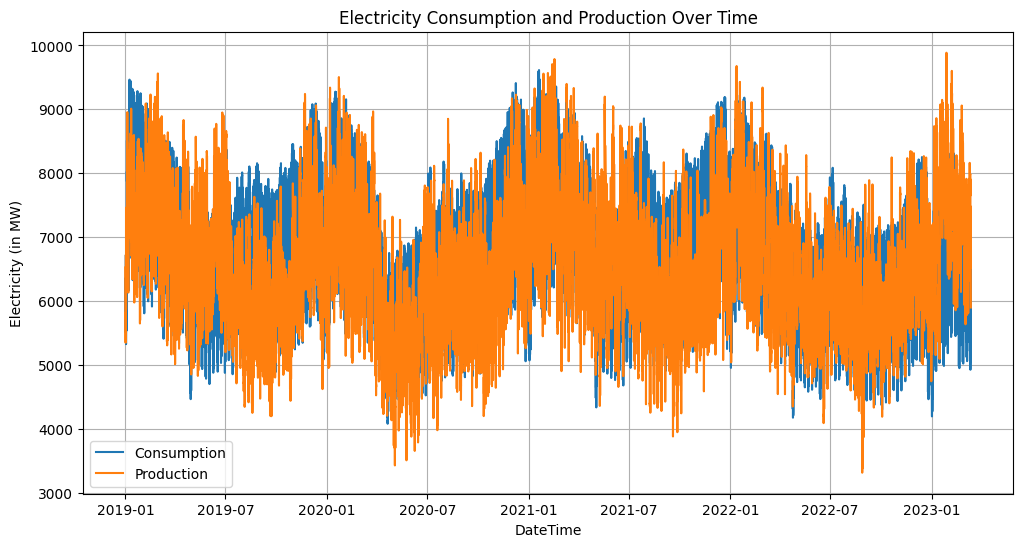

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Time Series Plot of Consumption and Production
plt.figure(figsize=(12, 6))
plt.plot(df_pandas['DateTime'], df_pandas['Consumption'], label='Consumption')
plt.plot(df_pandas['DateTime'], df_pandas['Production'], label='Production')
plt.title('Electricity Consumption and Production Over Time')
plt.xlabel('DateTime')
plt.ylabel('Electricity (in MW)')
plt.legend()
plt.grid(True)
plt.show()

# Other visualizations can be created similarly


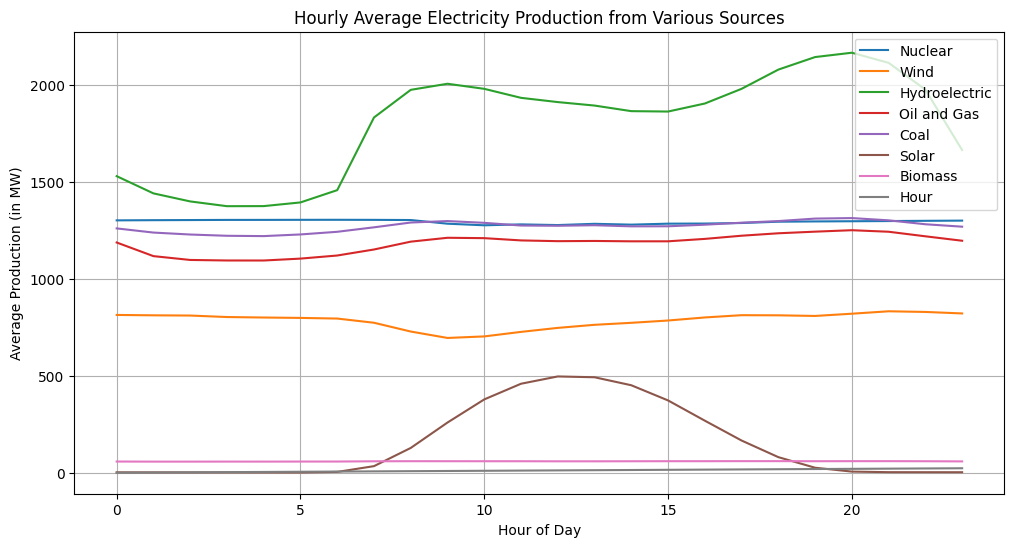

In [23]:
# Convert 'DateTime' to datetime and extract the hour for grouping
df_pandas['Hour'] = df_pandas['DateTime'].dt.hour

# Calculating hourly averages for each production source
hourly_averages = df_pandas.groupby('Hour')[df_pandas.columns[3:]].mean()

# Plotting
plt.figure(figsize=(12, 6))
for column in hourly_averages.columns:
    plt.plot(hourly_averages.index, hourly_averages[column], label=column)
plt.title('Hourly Average Electricity Production from Various Sources')
plt.xlabel('Hour of Day')
plt.ylabel('Average Production (in MW)')
plt.legend()
plt.grid(True)
plt.show()
